In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('../data/emdat.xlsx', sheet_name='EM-DAT Data')

In [3]:
types_to_consider = [
    'Drought', 
    'Earthquake', 
    'Extreme temperature', 
    'Flood', 
    'Storm', 
    'Wildfire',
    'Volcanic activity',
    'Mass Movement (Dry)',
    'Mass Movement (Wet)'
]

In [4]:
data = (df.query('`Disaster Type` in @types_to_consider')
          .groupby(['Disaster Type', 'ISO', 'Start Year'])
          .size()
          .unstack('Disaster Type')
          .fillna(0)
          .reset_index())
data

Disaster Type,ISO,Start Year,Drought,Earthquake,Extreme temperature,Flood,Storm,Volcanic activity,Wildfire
0,AFG,1954,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,AFG,1956,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,AFG,1963,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,AFG,1969,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AFG,1971,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
5788,ZWE,2017,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5789,ZWE,2019,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5790,ZWE,2021,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5791,ZWE,2022,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [5]:
df[['Disaster Type', 'Disaster Subtype']].drop_duplicates().sort_values(by='Disaster Type')

,Disaster Type,Disaster Subtype
146,Air,Air
21239,Animal incident,Animal incident
1656,Chemical spill,Chemical spill
972,Collapse (Industrial),Collapse (Industrial)
70,Collapse (Miscellaneous),Collapse (Miscellaneous)
...,...,...
21253,Volcanic activity,Lava flow
36,Water,Water
847,Wildfire,Wildfire (General)
342,Wildfire,"Land fire (Brush, Bush, Pasture)"


<Axes: xlabel='Start Year'>

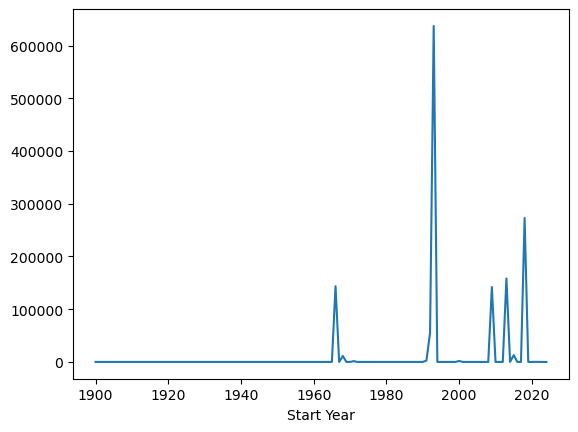

In [6]:
(df
     .groupby(['Disaster Type', 'ISO', 'Start Year'])
     ['Total Damage, Adjusted (\'000 US$)']
     .sum()
     .unstack('ISO')
     .LAO
     .unstack(0)
     .sum(axis=1)
     .plot(legend=False))

In [7]:
len(df.ISO.unique())

231